<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Did-Klay-Thompson-have-a-Hot-Hand?" data-toc-modified-id="Did-Klay-Thompson-have-a-Hot-Hand?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Did Klay Thompson have a Hot Hand?</a></span><ul class="toc-item"><li><span><a href="#Hypotheses" data-toc-modified-id="Hypotheses-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Hypotheses</a></span></li><li><span><a href="#Test-Statistics" data-toc-modified-id="Test-Statistics-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Test Statistics</a></span><ul class="toc-item"><li><span><a href="#Our-First-Test-Statistic:-Longest-Streak" data-toc-modified-id="Our-First-Test-Statistic:-Longest-Streak-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Our First Test Statistic: Longest Streak</a></span></li><li><span><a href="#Our-Second-Test-Statistic:-Shooting-Percentage" data-toc-modified-id="Our-Second-Test-Statistic:-Shooting-Percentage-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Our Second Test Statistic: Shooting Percentage</a></span></li><li><span><a href="#Another-Test-Statistic:-NBA-Jam-On-Fire" data-toc-modified-id="Another-Test-Statistic:-NBA-Jam-On-Fire-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Another Test Statistic: NBA Jam On Fire</a></span></li><li><span><a href="#Yet-Another-Statistic:-Sum-of-Klay's-Two-Longest-Streak" data-toc-modified-id="Yet-Another-Statistic:-Sum-of-Klay's-Two-Longest-Streak-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Yet Another Statistic: Sum of Klay's Two Longest Streak</a></span></li></ul></li><li><span><a href="#Interpretation-of-the-Results" data-toc-modified-id="Interpretation-of-the-Results-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Interpretation of the Results</a></span></li></ul></li><li><span><a href="#Does-Klay-Show-the-Hot-Hand-over-a-Season?" data-toc-modified-id="Does-Klay-Show-the-Hot-Hand-over-a-Season?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Does Klay Show the Hot Hand over a Season?</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Null-Distributions" data-toc-modified-id="Null-Distributions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Null Distributions</a></span></li></ul></li><li><span><a href="#How-Easy/Hard-is-it-to-Detect-the-Hot-Hand?" data-toc-modified-id="How-Easy/Hard-is-it-to-Detect-the-Hot-Hand?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>How Easy/Hard is it to Detect the Hot Hand?</a></span><ul class="toc-item"><li><span><a href="#Simulating-a-Hot-Hand" data-toc-modified-id="Simulating-a-Hot-Hand-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Simulating a Hot Hand</a></span></li><li><span><a href="#Distributions-of-Statistics" data-toc-modified-id="Distributions-of-Statistics-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Distributions of Statistics</a></span><ul class="toc-item"><li><span><a href="#Hard-to-Detect:-One-game" data-toc-modified-id="Hard-to-Detect:-One-game-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Hard to Detect: One game</a></span></li><li><span><a href="#Easy-to-Detect:-Lots-of-Games" data-toc-modified-id="Easy-to-Detect:-Lots-of-Games-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Easy to Detect: Lots of Games</a></span></li><li><span><a href="#Still-Easy-to-Detect:-Smaller-Effect-Size" data-toc-modified-id="Still-Easy-to-Detect:-Smaller-Effect-Size-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Still Easy to Detect: Smaller Effect Size</a></span></li></ul></li></ul></li><li><span><a href="#Summary-of-the-Hot-Hand" data-toc-modified-id="Summary-of-the-Hot-Hand-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary of the Hot Hand</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from hot_hand_helper import *

plt.style.use('fivethirtyeight')

random.seed(2018)

# The Hot Hand

The notion of a hot hand is often considered to be a cognitive fallacy, an error in our brains that ascribes more meaning to a random sequence of shots than we rightly should.  People have taken many different approaches to this topic and shis demo shows how one can use statistical testing tools to test the existence of the hot hand effect in basketball.

## Did Klay Thompson have a Hot Hand?

Let's take a look at Klay Thompson's shooting performance from Dec. 5, 2016 versus the Indiana Pacers.  Klay scored 60 points in 29 minutes of playing time, an unprecedented level of output in such a short amount of time.

A couple of quick facts:
+ Klay took 33 total shots and 14 three-pointers
+ He made 21 of his total shots, 8 of which were 3s (that means he made 10 FTs)


The first thing we look at Klay's sequence of shot results.  We represent this as a string of 0s and 1s (1s representing a make, naturally).  We want to test whether Klay's "hot handedness" led to abnormal results in his shooting.

In [2]:
klay60 = '110111100101111110010101110010101'

klay60_num_shots = len(klay60)
klay60_num_makes = num_matches(klay60, '1')
klay60_fgpct = klay60_num_makes / klay60_num_shots

print(f"""
FGM: {klay60_num_makes}
FGA: {klay60_num_shots}
FG%: {klay60_fgpct:.3f}
""")


FGM: 21
FGA: 33
FG%: 0.636



### Hypotheses

Our _null hypothesis_: **there is no hot hand effect**.  

Why do we choose this as the null hypothesis?  The standard approach in testing is to start with the assumption that an effect does not exist and work to try to provide evidence that it does.  For drugs or treatments, this means you start with the assumption that the drug or treatment has no effect on patient outcomes and gather data to show that the drug has a _statistically significant_ impact on outcomes.

In our case, we will use data to gather evidence to show that the hot hand effect exists.  We do this by building _test statistics_ that we use to try to reject the null hypothesis in favor an _alternative hypothesis_: the alternative hypothesis **there is a hot hand effect**.

### Test Statistics

Okay, we know our null and alternative hypotheses.  But how do we test them?  How do we even quantify what we think the hot hand effect might be?  

In some cases, it is obvious what you need to test for.  For drug outcomes, we can directly tie outcome to an important and measurable variable and demonstrate that the drug has a positive impact on that measured variable.

The hot hand does not seem to have one fixed, uniform definition but is rather like the way Justice Potter Stewart referred to obscenity: I know it when I see it.  That's not good enough here so we're going to try a few things.  The first is looking at streaks.

#### Our First Test Statistic: Longest Streak

First, we're going to look at Klay's longest streak to see if it's longer than we should expect.  His longest stretch of makes was 6 shots.  

In [3]:
klay60_streak = longest_streak(klay60)
klay60_streak

6

##### Distribution of Longest Streak

Now that we know Klay's longest streak was 6 makes, we need to know how 6 stacks up as a streak compared to a player similar to Klay but who definitely does not have a hot hand effect.  That is, we need to compute the distribution of the statistics assuming the null hypothesis, where there is no hot hand, is the proper model.  The distribution of the statistic when assuming the null hypothesis is sometimes called the _null distribution_.

How do we create such a player?  One way is by modeling our null player's shots as the result of _weighted coin flips_.  A weighted coin flip is a coin flip where instead of a 50-50 chance of coming up heads, the coin will come up head with some prescribed probability $p$.  We take the probability as equal to Klay's shooting perentage and the number of heads we get from one simulation will be Klay's made field goal attempts.

Another important consideration is how many times to flip the coin.  We use the total number of shot's Klay took in the game.  Why?  We want to match the simulated player to Klay and the number of shots taken plays an important role in how likely we are to see certain phenomenon. 

We use a function called `coin_flips` to simulate the weighted coin flips to determine how many shots a player like Klay makes in a single simulation.  We then create a random shuffling of the makes and misses and compute the longest streak of makes.  Finally, we plot the histogram.

In [4]:
n_permutations = 10000
klay_fgpct = .463

streaks_null = []
for i in range(n_permutations):
    # Simulate the coin flips
    fgm = coin_flips(n_flips=klay60_num_shots, prob_heads=klay_fgpct)
    # Shuffle the shots
    klay60_shuffled = shuffle('1'*fgm + '0'*(klay60_num_shots - fgm))
    # Compute the longest streak
    streak_shuff = longest_streak(klay60_shuffled)
    streaks_null.append(streak_shuff)

streaks_null = np.array(streaks_null)

When we look at the histogram, we find that Klay's streak of 6 is really not that uncommon for a player like him. About 15% of simulations produced a streak at least as long as 6.  As of now, other than the raw totals (perhaps due just to increase shots taken), Klay's performance does not look extraordinary.

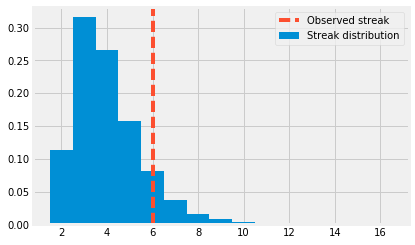

In [5]:
fig, ax = plt.subplots()
ax.hist(streaks_null, bins=np.arange(1.5, 17.5, 1.), normed=True, label='Streak distribution')
ax.axvline(x=klay60_streak, ls='--', color='C1', label='Observed streak')
ax.legend();

#### Our Second Test Statistic: Shooting Percentage

This is easy.  We're going to test the shooting percentage if he was hot for the whole game instead of for a long streak.

In [6]:
n_simulations = 10000
klay_fgpct = .463

klay_fgpct_null = []
for i in range(n_simulations):
    # Simulate the coin flips
    fgm = coin_flips(n_flips=klay60_num_shots, prob_heads=klay_fgpct)
    # Compute shooting percentage
    klay_fgpct_null.append(fgm / klay60_num_shots)
    
klay_fgpct_null = np.array(klay_fgpct_null)

##### Distribution of Shooting Percentage

Naturally the observed shooting percentage for a random player will center around the expected shooting percentage. Interestingly, Klay's shooting percetage is in the top ~4% among the simulations, so that's kind of extreme.  Maybe Klay has nights where he's feeling great and shoots really well.

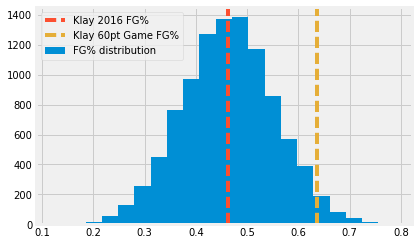

In [7]:
fig, ax = plt.subplots()
ax.hist(klay_fgpct_null, bins=21, label='FG% distribution')
ax.axvline(x=klay_fgpct, ls='--', color='C1', label='Klay 2016 FG%')
ax.axvline(x=klay60_fgpct, ls='--', color='C2', label='Klay 60pt Game FG%')
ax.legend(loc=2);

#### Another Test Statistic: NBA Jam On Fire

Another way to quantify the hot hand is using a well-known approach proposed by Amos Tversky and his collaborators.  The hot hand of Tversky is similar to the notion of being "on fire" in the old arcade game NBA Jam.  In that game, if you made 3 shots in a row with a player, your player would be on fire (animated flames would denote this).  While on fire (until a miss), the player had an inflated probability of making shots.

The statistic to capture this affect, called $T_{k, hit}$, is easy to compute:
\begin{align*}
  T_{k, hit}
  & = \mathrm{Prob}(\text{Make $k+1$ shots in a row}\ \mathit{GIVEN}\ \text{Already made $k$ shots in a row})\\
  & = \frac{\#\{\text{Streaks of $k+1$ makes in a row}\}}{\#\{\text{Streaks of $k$ makes in a row}\}}
\end{align*}
If $T_{k, hit}$ is especially high, then the player could experience a hot hand.

A similar statistic can try to capture a cold hand:
\begin{align*}
  T_{k, miss}
  & = \mathrm{Prob}(\text{Make $k+1$-st shot}\ \mathit{GIVEN}\ \text{Already missed $k$ shots in a row})\\
  & = \frac{\#\{\text{Streak of $k$ misses followed by make}\}}{\#\{\text{Streaks of $k$ misses in a row}\}}
\end{align*}
If the value of $T_{k, miss}$ is especially high, then the player _does not_ experience a cold hand because he will see reversals in his streaks.

We'll look at $k=2$ but similar results will hold for $k=3$.

In [8]:
T_2_hit = compute_t_k_hit(klay60, k=2)
T_2_miss = compute_t_k_miss(klay60, k=2)

print(f"""
T_2_hit:  {T_2_hit:.3f} 
T_2_miss: {T_2_miss:.3f}
""")


T_2_hit:  0.636 
T_2_miss: 1.000



Okay, we have two numbers, $T_{k, hit}$ and $T_{k, miss}$.  Without context, they do not mean much.  We know that Klay reversed each of streaks of 2 misses.  And we know he shot 63.6% following streaks of 2.  Of course, he shot 63.6% overall on that day.

##### Distribution of Tversky's Statistics

We're going to do the same thing as before: we're going to model the player who does not have the hot hand using a weighted coin flip.  The process is identical to the longest streak process.

Note: In the simulated data, sometimes we might not see any streaks of length 2.  In that case, the statistic does not have a valid value so we just ignore that simulation.

In [9]:
n_simulations = 10000
klay_fgpct = .463

T_2_hit_null = []
T_2_miss_null = []
for i in range(n_simulations):
    # Simulate the coin flips
    fgm = coin_flips(n_flips=klay60_num_shots, prob_heads=klay_fgpct)
    # Shuffle the shots
    klay60_shuffled = shuffle('1'*fgm + '0'*(klay60_num_shots - fgm))
    # Compute the statistics
    T_2_hit_shuff = compute_t_k_hit(klay60_shuffled, k=2)
    T_2_miss_shuff = compute_t_k_miss(klay60_shuffled, k=2)
    if T_2_hit_shuff is not None:
        T_2_hit_null.append(T_2_hit_shuff)
    if T_2_miss_shuff is not None:
        T_2_miss_null.append(T_2_miss_shuff)

T_2_hit_null = np.array(T_2_hit_null)
T_2_miss_null = np.array(T_2_miss_null)

##### Histograms of the null distributions

We recognize that the observation of Tversky's statistic for Klay's 60 pt game was not extraordinary.  For one, his perceived increased ability to extend his shooting streak is within the possibility of random chance.  His ability to reverse his cold streak seems noteworthy in how he was perfect in avoiding missing 3 shots in a row, however given that for the game he shot 63.6%, we already know he's not going to miss many shots and therefore not likely have a prolonged streak of misses.  We'll return to this issue later.

Okay, so maybe there's no streakiness in his shooting.  Maybe he was just feeling it all game and shot a much higher percentage than usual.  We'll test that next.

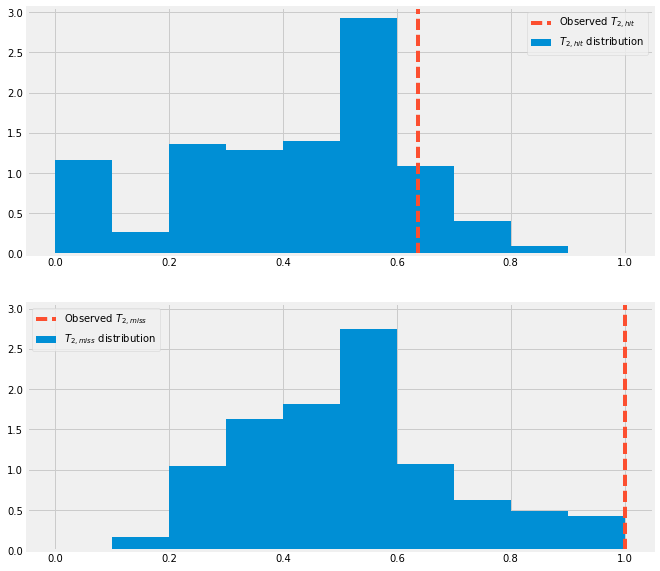

In [10]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 10), sharey=True)
ax[0].hist(T_2_hit_null, normed=True, label='$T_{2,hit}$ distribution')
ax[0].axvline(x=T_2_hit, ls='--', color='C1', label='Observed $T_{2,hit}$')
ax[0].legend();

ax[1].hist(T_2_miss_null, normed=True, color='C0', label='$T_{2,miss}$ distribution')
ax[1].axvline(x=T_2_miss, ls='--', color='C1', label='Observed $T_{2,miss}$')
ax[1].legend();

#### Yet Another Statistic: Sum of Klay's Two Longest Streak

This is similar to the longest streak but maybe Klay doesn't necessarily generate long streaks but has an ability to get on a streak so he generates multiple longish streaks.  We can try to capture this by the length of his two longest streaks.

In [11]:
klay60_two_streaks = longest_two_streaks(klay60, match='1')
klay60_two_streaks

10

So again, Klay's combined value of 10 (streaks of 6 and 4) is also not especially noteworthy.

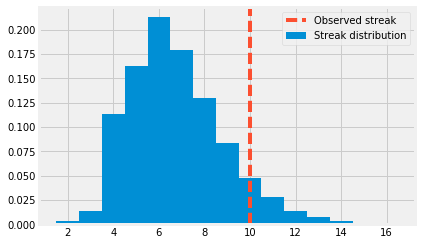

In [12]:
n_simulations = 10000
klay_fgpct = .463

two_streaks_null = []
for i in range(n_simulations):
    # Simulate the coin flips
    fgm = coin_flips(n_flips=klay60_num_shots, prob_heads=klay_fgpct)
    # Shuffle the shots
    klay60_shuffled = shuffle('1'*fgm + '0'*(klay60_num_shots - fgm))
    # Compute the statistic
    two_streak_shuff = longest_two_streaks(klay60_shuffled)
    two_streaks_null.append(two_streak_shuff)

two_streaks_null = np.array(two_streaks_null)

fig, ax = plt.subplots()
ax.hist(two_streaks_null, bins=np.arange(1.5, 17.5, 1.),
        normed=True, label='Streak distribution')
ax.axvline(x=klay60_two_streaks, ls='--', color='C1', label='Observed streak')
ax.legend();

### Interpretation of the Results

The statistics we produced seem to show that while the game was noteworthy for the volume of shooting and scoring in such a compressed time frame, the actually efficiency numbers were not particularly extraordinary for a player of Klay's ability.  

However, we should note a few things:
+ We've lumped together 2s and 3s: if you reran this analysis separating the 2s and 3s, you wouldn't get a different or special view.  Klay shoots about 42% from three so he's already really good and will just have games where the shots fall.
+ The statistics do seem on the extreme end and we kind of wrote that off saying that they weren't so extreme to convince us Klay had a special night.  In fact, the story is actually a bit more damning for the hot hand as we'll see below.


Klay's 60 point game was not one single game but actually just one of many games.  He's had many opportunities to shoot and put up gawdy numbers (~300 since Steve Kerr started coaching for the Warriors).  Given that he's had about 300 opportunities, if we observe a statistic that says it should happen about 1 in 100 times for a random no-hot-hand weighted coin flip player, then it should have happened about 3 times over 300 games.  The fact that Klay has had tons of games in order to put up gawdy numbers means that by picking the most gawdiest, we've accidentally cherry-picked this game and our standard for extremeness needs to be much higher.

Let's actually look at how often Klay has an extreme looking performance and compare to what would be predicted by the weighted coin flip model.

Here are some numbers to put this in context (see cells below for the computation):
+ Klay shot 68.4% on 19 two-point attempts in the 60pt game.  From 2014-15 to 2017-18, he had 21 games where he shot at least 15 2-pt shots and in 1 of those (this 60 pt game) he shot at least 68.4%.  In our coin flip model, using his 2-pt pct of 49% and those 21 games, we'd expect about 1 game shooting at least 68.4%.  
+ Klay shot 57.1% on 14 three-point attempts in the game.  In that same Kerr-era time span for the Warriors, he had 74 games where he had at least 10 3-pt shot attempts and in 15 of those games he shot at least 57.1% from 3.  In our coin flip model, using his 3-pt pct of 42% and 74 games of 10 3pt attempts, we'd expect about 15 games shooting at least 57.1%.  

So even though this game was a bit extreme, it was not that extreme compared to other Klay performances.  And when you factor in how often he plays and has an opportunity to have a gawdy shooting night, his performances match up with what'd you expect from a player shooting with weighted coin flips.

Now, he took 33 shots and it's his only game with at least 29 shots.  That's fairly special but is it really that special given that the team was passing the ball to Klay and allowing him to shoot?  This would be like riding out your luck at a casino game.  You perceive a run of luck and decided to keep playing and while the run may last longer than usual, it wasn't anything but a produce of luck.  

The takeaway: Klay's shooting performances for his career are just not out of line with what we expect from our coin flip model.  

In [13]:
n_simulations = 10000
klay60_2fgpct = 0.684
klay_2fgpct = 0.49
klay_2fga = 15
n_games = 21

klay_2fgpct_null = []
for i in range(n_simulations):
    klay_2fgm = coin_flips(klay_2fga, klay_2fgpct)
    klay_2fgpct_null.append(klay_2fgm / klay_2fga)
    
klay_2fgpct_null = np.array(klay_2fgpct_null)

sims_greater_than_Klay60_2s = int(np.sum(klay_2fgpct_null >= klay60_2fgpct))
frac_greater_than_Klay60_2s = sims_greater_than_Klay60_2s / n_simulations
extreme_2pt_games_per_G = frac_greater_than_Klay60_2s * n_games
print(f"""
Sims more extreme than Klay 60:       {sims_greater_than_Klay60_2s}
Fraction of sims more extreme:        {frac_greater_than_Klay60_2s:.2f}
Extreme 2pt Games per {n_games} Team Games:  {extreme_2pt_games_per_G:.2f}
""")


Sims more extreme than Klay 60:       520
Fraction of sims more extreme:        0.05
Extreme 2pt Games per 21 Team Games:  1.09



In [14]:
n_simulations = 10000
klay60_3fgpct = 0.571
klay_3fgpct = 0.42
klay_3fga = 10
n_games = 74

klay_3fgpct_null = []
for i in range(n_simulations):
    klay_3fgm = coin_flips(klay_3fga, klay_3fgpct)
    klay_3fgpct_null.append(klay_3fgm / klay_3fga)
klay_3fgpct_null = np.array(klay_3fgpct_null)

sims_greater_than_Klay60_3s = int(np.sum(klay_3fgpct_null >= klay60_3fgpct))
frac_greater_than_Klay60_3s = sims_greater_than_Klay60_3s / n_simulations
extreme_3pt_games_per_G = frac_greater_than_Klay60_3s * n_games
print(f"""
Sims more extreme than Klay 60:       {sims_greater_than_Klay60_3s}
Fraction of sims more extreme:        {frac_greater_than_Klay60_3s:.2f}
Extreme 3pt Games per {n_games} Team Games:  {extreme_3pt_games_per_G:.2f}
""")


Sims more extreme than Klay 60:       2062
Fraction of sims more extreme:        0.21
Extreme 3pt Games per 74 Team Games:  15.26



## Does Klay Show the Hot Hand over a Season?

In one of Klay's most stellar games, it appears that any potential hot handedness can be chalked up to luck producing a performance that we as humans think is more extreme or impressive than it actually is. 

If Klay really has a hot hand effect, he'll routinely show it over the season.  We can try to detect this by looking at Tversky's statistics but computed across all of Klay's games for a season.  Here's an explanation for the setup:
1. Take all of Klay's 3pt shots in a given year and look at game's 3pt shot sequence.  We restrict to 3pt shots this time because we want to be a bit more judicious about not mixing different shot results which can have drastically different expected make probabilities.
2. For each game, we compute 4 quantities:
\begin{gather*}
    \#\{\text{Streaks of $k+1$ makes in a row}\},\ 
    \#\{\text{Streaks of $k$ makes in a row}\},\\
    \#\{\text{Streak of $k$ misses followed by make}\},\ 
    \#\{\text{Streaks of $k$ misses in a row}\}
\end{gather*}
for $k=1, 2, 3$.  We add these to running totals for the Klay's season.
3. To generate the null distribution, we take each game's shot sequence and randomly shuffle it 500 times.  For each shuffling we compute the statistics and add to a set of 500 running totals.  This means we keep the number of shots made the same for each game.  Why do we do this instead of using the weighted coin flip model?  We actually could have done this before for Klay's performance but the conclusions wouldn't have changed.  We're using it now because it's easier to implement but is still useful: we've randomized the sequence of shot results holding the number of makes fixed so we can see if there is anything special in the sequencing.

### Data
Producing this data takes a bit of effort so I've gone ahead and done it already and stored it CSV format.

In [15]:
klay_season_hot_hand = pd.read_csv('klay_season_hot_hand.csv', index_col=['year', 'k'])
klay_season_hot_hand_null = pd.read_csv('klay_season_hot_hand_null.csv.gz', index_col=['year', 'k'])

### Null Distributions

We can look at each year but the conclusion is going to be the same no matter what: there is no strong evidence that there is any hot hand sequencing in Klay's 3pt shooting.

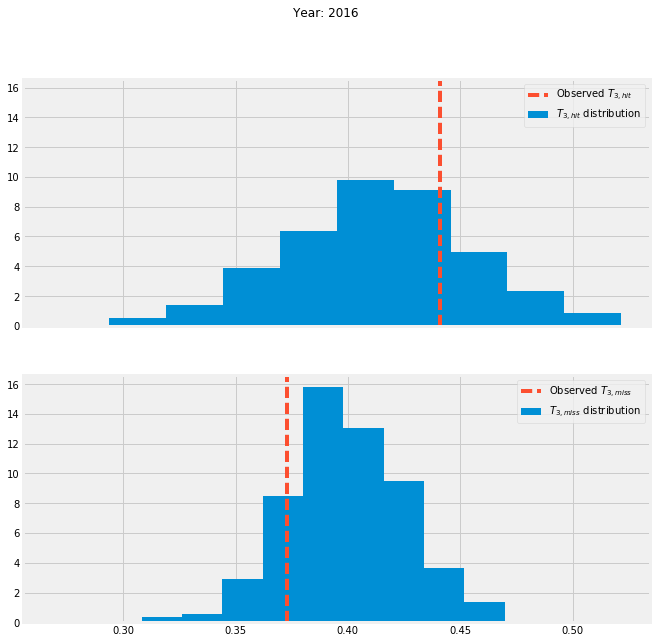

In [16]:
year = 2016
k = 2

klay_T_3_hit = klay_season_hot_hand.loc[(year, k), 't_k_hit']
klay_T_3_hit_null = klay_season_hot_hand_null.loc[(year, k), 't_k_hit']
klay_T_3_miss = klay_season_hot_hand.loc[(year, k), 't_k_miss']
klay_T_3_miss_null = klay_season_hot_hand_null.loc[(year, k), 't_k_miss']

fig, ax = plt.subplots(nrows=2, figsize=(10, 10), sharey=True, sharex=True)
fig.suptitle(f"Year: {year}")
ax[0].hist(klay_T_3_hit_null, normed=True, label='$T_{3,hit}$ distribution')
ax[0].axvline(x=klay_T_3_hit, ls='--', color='C1', label='Observed $T_{3,hit}$')
ax[0].legend();

ax[1].hist(klay_T_3_miss_null, normed=True, color='C0', label='$T_{3,miss}$ distribution')
ax[1].axvline(x=klay_T_3_miss, ls='--', color='C1', label='Observed $T_{3,miss}$')
ax[1].legend();

## How Easy/Hard is it to Detect the Hot Hand?

We've worked hard to try to detect the hot hand, but given that we seem to not have found anything, we should wonder, how hard is it to actually detect a hot hand using the statistics we have been using.

To do this, we're going to simulate a hot hand player compared to a non-hot hand player (ie. a weighted coin flip) and compare how the distribution of the statistics to see just how different they are.

The extent that a test statistic can detect an effect is known as _statistical power_ and is incredibly important.  There are three things that drive power: sample size, effect size, quality of the statistic.  We're not dealing with complicated statistics so the last one doesn't really apply.  The first two are always important.  

A lot of studies that are reported on in popular press often have tests with very little power and this is often due to small sample sizes.  The importance of power is that if a study has low power but is reporting a result, you should be very suspicious of the result because it's more likely something was done wrong instead of an actual effect being detected.

### Simulating a Hot Hand

Inspired by Tversky's statistic, let's simulate a player that should be well estimated by that statistic.  The normal shooting percentage for the player will be .35 while the hot shooting percentage will be .8.  The player will be hot after two makes in a row.  When the player misses, he reverts to normal.  The player starts the game normal.  

The seasonal average for this player will be about .45 so that is the shooting percentage we take for the coin flip player.

I chose these values because the difference in shooting between hot and normal is incredibly large.  If we can't detect this, then we're in trouble.

### Distributions of Statistics

#### Hard to Detect: One game

I generated 50,000 "games" where each player took 14 shots and for each game computed Tversky's statistic for $k=2$.  

The comparison of the distributions for the hot hand player and the non-hot hand player are as follows:

![hot_hand_1.png](hot_hand_1.png)

The way to interpret the histograms is that if we observed a game from a hot hand player, the observed value of the statistic would usually have a value that is entirely plausible from the coin flip player.  This means that it is really hard to distinguish between the hot hand player and the coin flip player.  It's almost assured that we wouldn't be able to detect the hot hand effect.

In an ideal world, the distribution for the hot hand player would be far to the right of the the coin flip player.  
So we see that the effect in an individual game is basically impossible to reliably detect.  The next simulations show easier detections.

#### Easy to Detect: Lots of Games

This time, I simulated 1000 "seasons" of 82 "games" where each player took 8 shots.

![hot_hand_4.png](hot_hand_4.png)

We see that observing the player over the course of a season will yield basically perfect detection for a hot hand effect of this size.


#### Still Easy to Detect: Smaller Effect Size

Again I simulated 1000 "seasons" of 82 "games" where each player took 8 shots.  But this time, $p_{hot} = .6$ and $p_{normal} = .42$.  This still corresponds to a seasonal average of about .45.

![hot_hand_5.png](hot_hand_5.png)

Even though the effect size is perhaps more reasonable, observing over the course of the season still makes the effect easy to detect.


## Summary of the Hot Hand

Here's what we have determined: a player who has a reputation as a streaky shooter actually has shooting performances which are in line with what we'd expect from a simple weighted coin flip model.  They're also in line with randomized shuffling instead of weighted coin flips.

Other studies indicate that recent performance (in baseball, over a 1 week period; in basketball, previous shot attempts) has a small amount predictive power.  In the NBA, an extra make in the previous 4 shots can lead to a 1.2% increase in make percentage.  This demo does not aim to refute those conclusions.  

However, ask yourself this: what do _you_ think of when you hear an announcer say a player is hot?  Compare that to the claims of predictive power from recent performance.  The usual mental model of a hot hand effect is likely not a small uptick in percentage but rather one where a player becomes unstoppable when they're hot.  Observed data does not back up our mental model of hot shooting yet when we look at whether it would even be possible over a season to detect a moderate hot hand effect, we see that Tversky's statistic is in fact pretty powerful.  

It's quite likely that if the effect were to exist, it would either be fairly small so that Tversky's statistic could not detect it, and thus not particularly consequential.  Or it would be large but more specialized and rare and thus more hidden than how it's conventionally been framed (turns on whenever a shooter makes multiple shots). 

This all goes with a general rule of statistics: if an effect really is there and big, you'll know it because it'll show up in the data and practically be punching you in the face to announce it's presence.  